In [1]:
import sys
import os

# Add project root
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.validation.validation import *
from src.eda.eda_metrics import *
from src.config.config import *
from src.utils.visualization import *


In [2]:
df = pd.read_csv(
    "../data/processed/indian_machinery_transaction_data_3.csv",
    parse_dates=["invoice_date"]
)

df.head()


,invoice_id,invoice_date,year,month,season,customer_type,brand,product_name,product_category,specification,quantity,mrp,selling_price,unit_cost,discount_pct,revenue,profit
0,500001,2019-01-01,2019,1,Winter,Retail,Supreme,PVC Pipe,Pipe,0.5 inch,1,89.61,83.49,70.69,6.83,83.49,12.80
1,500061,2019-01-01,2019,1,Winter,Retail,Jain,Sprinkler Set,Irrigation,Heavy Duty,2,2257.78,2224.77,1902.32,1.46,4449.54,644.90
2,500060,2019-01-01,2019,1,Winter,Contractor,Jain,Sprinkler Set,Irrigation,Mini,2,1446.31,1334.39,1222.70,7.74,2668.78,223.38
3,500059,2019-01-01,2019,1,Winter,Farmer,Jain,Sprinkler Set,Irrigation,Mini,1,1446.31,1195.99,1021.78,17.31,1195.99,174.21
4,500058,2019-01-01,2019,1,Winter,Retail,Jain,Sprinkler Set,Irrigation,Mini,3,1446.31,1423.58,1200.86,1.57,4270.74,668.16


## Shape of the dataset

In [3]:
dataset_shape(df)


{'rows': 223490, 'columns': 17}

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223490 entries, 0 to 223489
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_id        223490 non-null  int64         
 1   invoice_date      223490 non-null  datetime64[ns]
 2   year              223490 non-null  int64         
 3   month             223490 non-null  int64         
 4   season            223490 non-null  object        
 5   customer_type     223490 non-null  object        
 6   brand             223490 non-null  object        
 7   product_name      223490 non-null  object        
 8   product_category  223490 non-null  object        
 9   specification     223490 non-null  object        
 10  quantity          223490 non-null  int64         
 11  mrp               223490 non-null  float64       
 12  selling_price     223490 non-null  float64       
 13  unit_cost         223490 non-null  float64       
 14  disc

## Date range of the dataset

In [5]:
date_range_check(df)


{'min_date': Timestamp('2019-01-01 00:00:00'),
 'max_date': Timestamp('2025-06-30 00:00:00')}

In [6]:
price_below_cost_cases(df)

{'count': 2872, 'percentage': 1.29}

## Avg price trend

In [7]:
# avg_price_trend(df)

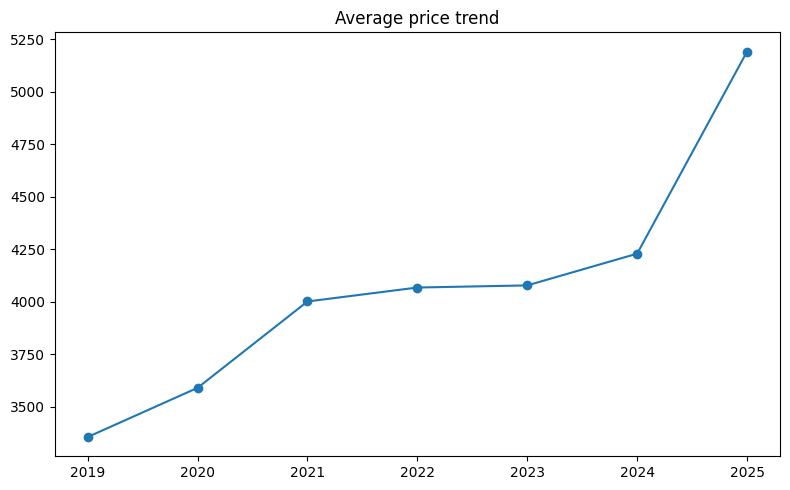

In [8]:
plot_line_chart(avg_price_trend(df),title="Average price trend",filename="avg_price_trend.png")

## Seasonality Validation


In [ ]:
# revenue_by_season(df)

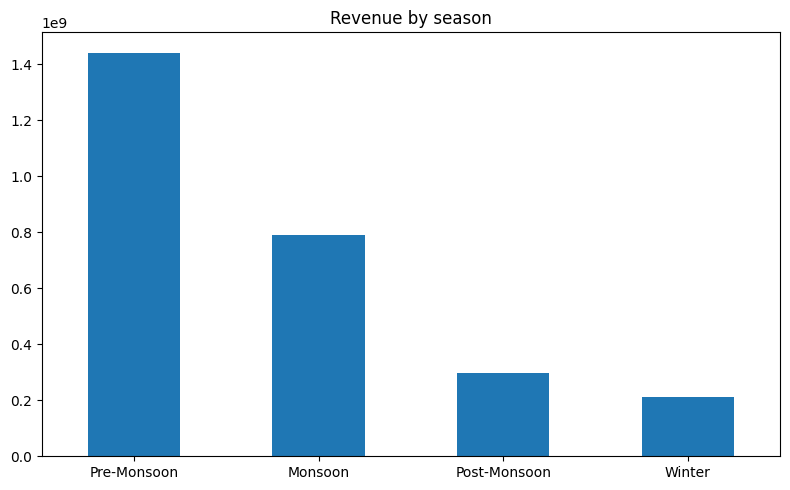

In [11]:
plot_bar_chart(revenue_by_season(df),title="Revenue by season",filename="revenue_by_season.png")

## Motor pump revenue by month

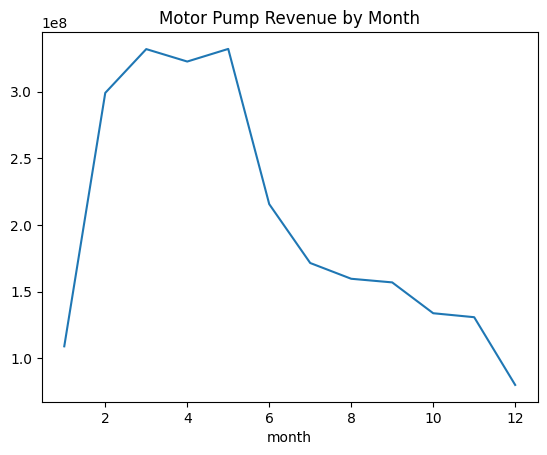

In [12]:
motor = df[df["product_category"] == "Motor"]

motor.groupby("month")["revenue"].sum().plot(
    title="Motor Pump Revenue by Month"
)
plt.savefig("../reports/EDA/images/motor_revenue_by_month.png")
plt.show()


## External price shocks

C:\Users\jaipr\AppData\Local\Temp\ipykernel_12392\643859086.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["selling_price"]


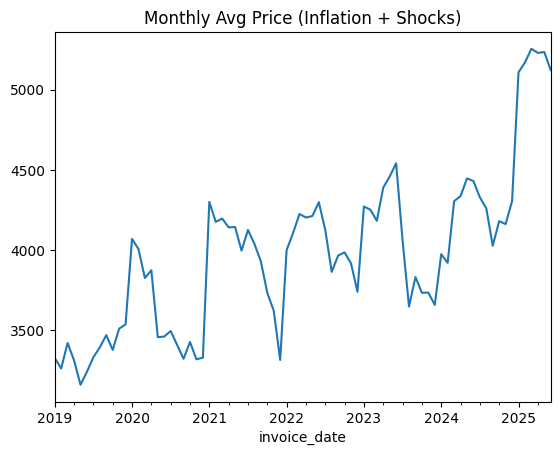

In [13]:
monthly_price = (
    df.set_index("invoice_date")
      .resample("M")["selling_price"]
      .mean()
)

monthly_price.plot(
    title="Monthly Avg Price (Inflation + Shocks)"
)
plt.savefig("../reports/EDA/images/external_price_shocks.png")
plt.show()
